### Estimadores

In [1]:
est_avg = function(ms) {
    return (2 * mean(ms))
}

est_max = function(ms) {
    return(max(ms))
}

In [2]:
my_ms = c(1.17,1.75,0.28,2.56,2.36,0.36,1.82,0.24,1.17,1.86)

print(c('ext_avg', est_avg(my_ms)), quote=F)
print(c('ext_max', est_max(my_ms)), quote=F)

[1] ext_avg 2.714  
[1] ext_max 2.56   


In [3]:
Nrep = 1000
ns = c(5, 30, 50)
muestras = lapply(1:Nrep, function(x) runif(max(ns), 0, 3))

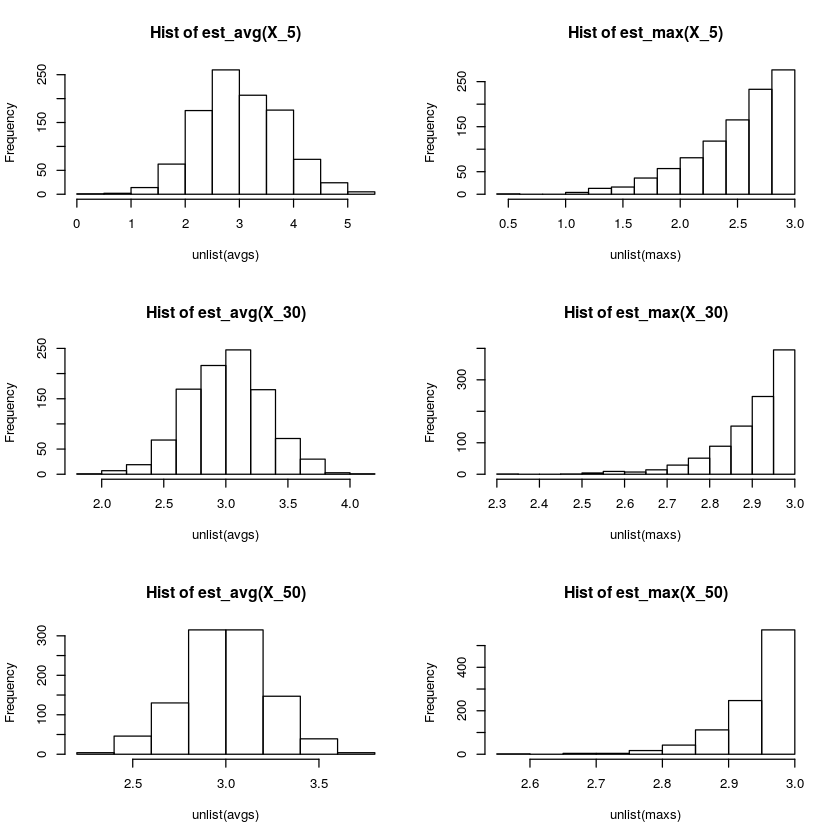

In [4]:
par(mfrow=c(length(ns), 2))
for (n in ns) {
    avgs = lapply(muestras, function(x) est_avg(x[1:n]))
    maxs = lapply(muestras, function(x) est_max(x[1:n]))
    hist(unlist(avgs), main=paste(c("Hist of est_avg(X_", n, ")"), sep="", collapse=""), freq=T)
    hist(unlist(maxs), main=paste(c("Hist of est_max(X_", n, ")"), sep="", collapse=""), freq=T)
}

### Ejercicio 5

In [5]:
ns = c(5, 30, 50, 100, 500)
muestras = matrix(NA, Nrep, max(ns))
for (i in 1:Nrep) {
    muestras[i,] = runif(max(ns), 0, 3)
}

In [6]:
emce = function(est) sapply(ns, function(n) mean(sapply(1:Nrep, function(row) (est(muestras[row,1:n]) - 3) ** 2)))

In [7]:
emce_max = emce(est_max)
emce_avg = emce(est_avg)

In [8]:
mses<-data.frame(rbind(emce_max,emce_avg))
colnames(mses)<-ns
rownames(mses)<-c("max","avg")

In [9]:
mses

,5,30,50,100,500
max,0.4014900,0.01628165,0.006825387,0.001721852,7.333126e-05
avg,0.5845963,0.10056037,0.059615373,0.029106906,6.302739e-03


## Intervalos de confianza

In [11]:
intervalo.mu.asin = function(alpha, ma) {
    z = qnorm(alpha/2)
    mu = mean(ma)
    S = sqrt(sum((ma - mu) ** 2) / length(ma))
    dev = z * S / sqrt(length(ma))
    return(c(mu + dev, mu - dev))
}

In [12]:
## Ej 7
sigmas = c(0.1, 1, 10)
mu = 0
alpha = 0.05
ns = c(5, 10, 30, 50, 100, 1000)
Nrep = 1000
longs = data.frame(matrix(ncol=length(ns), nrow=length(sigmas)))
cover = data.frame(matrix(ncol=length(ns), nrow=length(sigmas)))
rownames(cover) = sigmas
rownames(longs) = sigmas
colnames(cover) = ns 
colnames(longs) = ns 
for (i in 1:length(sigmas)) {
    sigma = sigmas[i] 
    for (j in 1:length(ns)) {
        n = ns[j]
        mas = lapply(1:Nrep, function(k) rnorm(n, mu, sigma))
        intervalos = lapply(mas, function(ma) intervalo.mu.asin(alpha, ma))
        cover[i,j] = mean(sapply(1:Nrep, function(k) {
            inter = intervalos[[k]]
            mu >= inter[1] & mu <= inter[2]
        }))
        all_longs = rep(0, Nrep)
        for (idx in 1:Nrep) {
            inter = intervalos[[idx]]
            all_longs[idx] = inter[2] - inter[1]
        }
        longs[i,j] = mean(all_longs)
    }
}
print('Cover')
cover
print('Longs')
longs

[1] "Cover"


,5,10,30,50,100,1000
0.1,0.843,0.882,0.940,0.932,0.934,0.936
1,0.857,0.900,0.944,0.935,0.933,0.945
10,0.849,0.901,0.934,0.948,0.940,0.953


[1] "Longs"


,5,10,30,50,100,1000
0.1,0.1452013,0.1137107,0.0694329,0.0543065,0.03890894,0.01239059
1,1.4694504,1.1286026,0.7046425,0.5498671,0.39035725,0.12380035
10,14.5337340,11.4469955,6.9822199,5.4684887,3.88273900,1.23888907


In [ ]:
coverage = function(sample_fs, fs_params, inter_f, ns) {
    
}